# **SURAJ PATI  |  21EC39025**
---
---
# Installing **OpenCV**
---

In [94]:
!pip install opencv-python

# Importing Libraries
---

In [95]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Reading the Image
---



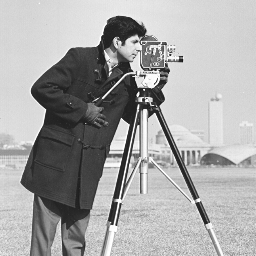

In [96]:
image = cv2.imread('/content/cameraman.bmp')
cv2_imshow(image)

# Scaling using Nearest Neighbour Interpolation
---

In [97]:
def nearest_neighbor_interpolation(image, scale_factor):
    # Get the original height and width of the image
    original_height, original_width = image.shape[:2]

    # Calculate the new height and width based on the scale factor
    new_height = int(original_height * scale_factor)
    new_width = int(original_width * scale_factor)

    # Create an empty array for the scaled image with the new dimensions
    # Initialize it with zeros and the same number of color channels as the original image
    scaled_image = np.zeros((new_height, new_width, image.shape[2]), dtype=np.uint8)

    # Iterate over each pixel in the new scaled image
    for y in range(new_height):
        for x in range(new_width):
            # Find the corresponding pixel in the original image using the scale factor
            src_x = int(x / scale_factor)
            src_y = int(y / scale_factor)

            # Assign the value of the nearest neighbor pixel to the current pixel in the scaled image
            scaled_image[y, x] = image[src_y, src_x]

    # Return the scaled image
    return scaled_image

Enter Scale Factor: 3.2


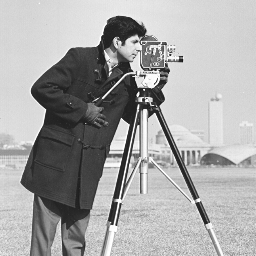

Original Image


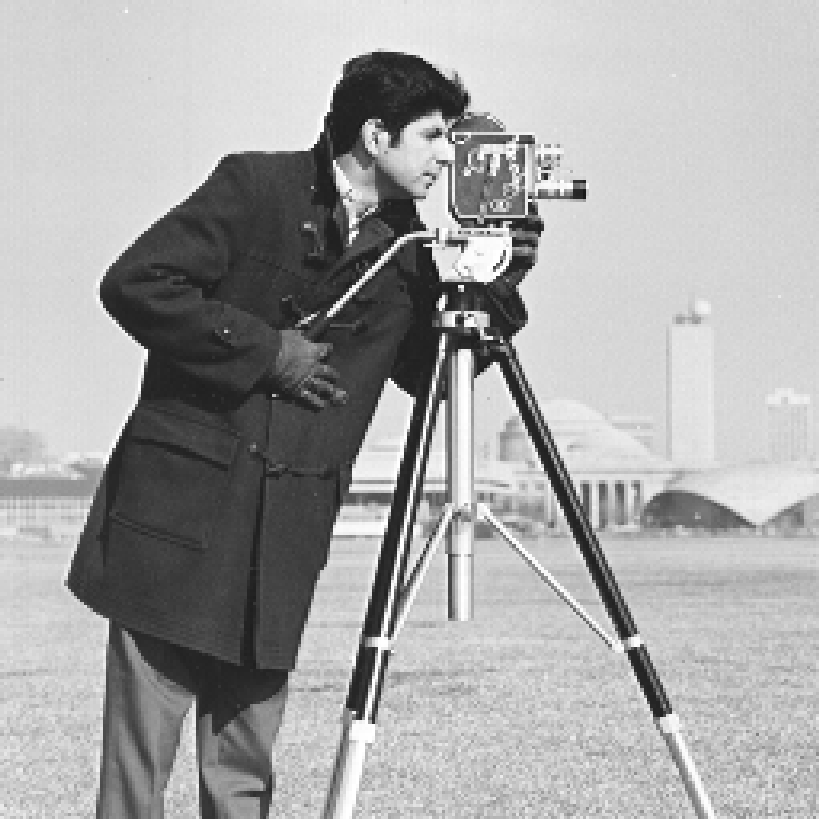

Scaled Image (Nearest Neighbour Interpolation)


In [98]:
scale_factor = float(input("Enter Scale Factor: "))
scaled_nn_image = nearest_neighbor_interpolation(image, scale_factor)
cv2_imshow(image)
print("Original Image")
cv2_imshow(scaled_nn_image)
print("Scaled Image (Nearest Neighbour Interpolation)")

# Scaling using Bilinear Interpolation
---

In [99]:
def bilinear_interpolation(image, scale_factor):
    # Get the original height and width of the image
    original_height, original_width = image.shape[:2]

    # Calculate the new height and width based on the scale factor
    new_height = int(original_height * scale_factor)
    new_width = int(original_width * scale_factor)

    # Create an empty array for the scaled image with the new dimensions
    # Initialize it with zeros and the same number of color channels as the original image
    scaled_image = np.zeros((new_height, new_width, image.shape[2]), dtype=np.uint8)

    # Iterate over each pixel in the new scaled image
    for y in range(new_height):
        for x in range(new_width):
            # Find the corresponding floating-point coordinates in the original image
            src_x = x / scale_factor
            src_y = y / scale_factor

            # Calculate the integer coordinates of the surrounding pixels
            x1 = int(np.floor(src_x))
            x2 = min(x1 + 1, original_width - 1)
            y1 = int(np.floor(src_y))
            y2 = min(y1 + 1, original_height - 1)

            # Calculate the distance between the source coordinate and the top-left pixel
            dx = src_x - x1
            dy = src_y - y1

            # Iterate over each color channel
            for c in range(image.shape[2]):
                # Calculate the interpolated pixel value
                value = (image[y1, x1, c] * (1 - dx) * (1 - dy) +
                         image[y1, x2, c] * dx * (1 - dy) +
                         image[y2, x1, c] * (1 - dx) * dy +
                         image[y2, x2, c] * dx * dy)

                # Assign the interpolated value to the corresponding pixel in the scaled image
                scaled_image[y, x, c] = int(value)

    # Return the scaled image
    return scaled_image

Enter Scale Factor: 3.2


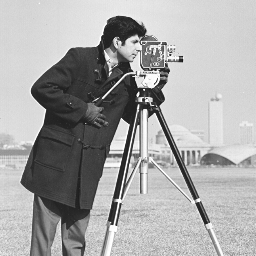

Original Image


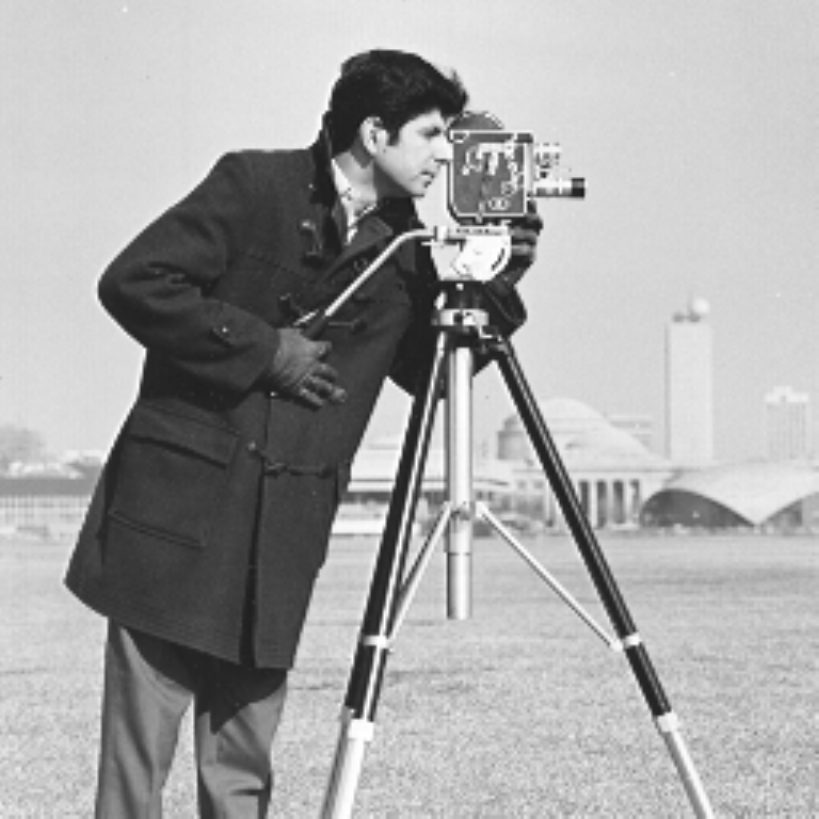

Scaled Image (Bilinear Interpolation)


In [100]:
scale_factor = float(input("Enter Scale Factor: "))
scaled_bilinear_image = bilinear_interpolation(image, scale_factor)
cv2_imshow(image)
print("Original Image")
cv2_imshow(scaled_bilinear_image)
print("Scaled Image (Bilinear Interpolation)")

# Rotation using Nearest Neighbour Interpolation
---

In [101]:
def calculate_new_dimensions(image, theta):
    # Get the original height and width of the image
    height, width = image.shape[:2]

    # Convert the rotation angle from degrees to radians
    theta_rad = np.deg2rad(theta)

    # Calculate the new width and height of the rotated image
    new_width = int(abs(height * np.sin(theta_rad)) + abs(width * np.cos(theta_rad)))
    new_height = int(abs(height * np.cos(theta_rad)) + abs(width * np.sin(theta_rad)))

    return new_width, new_height

def rotate_image_nearest_neighbor(image, theta):
    # Get the original height and width of the image
    height, width = image.shape[:2]

    # Calculate the new dimensions of the rotated image
    new_width, new_height = calculate_new_dimensions(image, theta)

    # Convert the rotation angle from degrees to radians
    theta_rad = np.deg2rad(theta)

    # Calculate the center of the original image
    center_x, center_y = width // 2, height // 2

    # Calculate the center of the new rotated image
    new_center_x, new_center_y = new_width // 2, new_height // 2

    # Create an empty array for the rotated image with the new dimensions
    rotated_image = np.zeros((new_height, new_width, image.shape[2]), dtype=image.dtype)

    # Iterate over each pixel in the new rotated image
    for y in range(new_height):
        for x in range(new_width):
            # Translate the coordinates to the new center
            x_new = x - new_center_x
            y_new = y - new_center_y

            # Apply the rotation matrix to get the coordinates in the original image
            x_rotated = int(x_new * np.cos(theta_rad) + y_new * np.sin(theta_rad))
            y_rotated = int(-x_new * np.sin(theta_rad) + y_new * np.cos(theta_rad))

            # Translate the coordinates back to the original center
            x_rotated += center_x
            y_rotated += center_y

            # If the rotated coordinates are within the bounds of the original image, copy the pixel value
            if 0 <= x_rotated < width and 0 <= y_rotated < height:
                rotated_image[y, x] = image[y_rotated, x_rotated]

    # Return the rotated image
    return rotated_image

Enter Rotation Angle (in degrees): 53.4


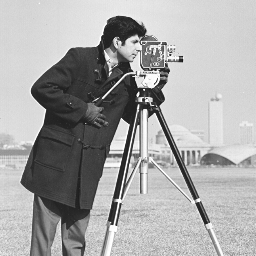

Original Image


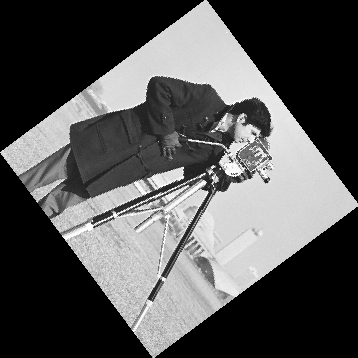

Rotated Image (Nearest Neighbour Interpolation)


In [102]:
theta = float(input("Enter Rotation Angle (in degrees): "))
cv2_imshow(image)
print("Original Image")
rotated_image_nn = rotate_image_nearest_neighbor(image, theta)
cv2_imshow(rotated_image_nn)
print("Rotated Image (Nearest Neighbour Interpolation)")

# Rotation using Bilinear Interpolation
---

In [103]:
def get_pixel_value(image, x, y):
    # Get the height and width of the image
    height, width = image.shape[:2]

    # Check if the coordinates are out of bounds
    if x < 0 or x >= width or y < 0 or y >= height:
        return 0  # Return 0 for out of bounds coordinates

    return image[y, x]  # Return the pixel value at the given coordinates

def bilinear_interpolate(image, x, y):
    # Calculate the coordinates of the four surrounding pixels
    x1, y1 = int(np.floor(x)), int(np.floor(y))
    x2, y2 = min(x1 + 1, image.shape[1] - 1), min(y1 + 1, image.shape[0] - 1)

    # Get the pixel values at the four surrounding pixels
    q11 = get_pixel_value(image, x1, y1)
    q21 = get_pixel_value(image, x2, y1)
    q12 = get_pixel_value(image, x1, y2)
    q22 = get_pixel_value(image, x2, y2)

    # Perform bilinear interpolation in the x-direction
    if x2 == x1:
        r1 = q11
        r2 = q12
    else:
        r1 = (x2 - x) * q11 + (x - x1) * q21
        r2 = (x2 - x) * q12 + (x - x1) * q22

    # Perform bilinear interpolation in the y-direction
    if y2 == y1:
        return r1
    else:
        return (y2 - y) * r1 + (y - y1) * r2

def rotate_image_bilinear(image, theta):
    # Get the original height and width of the image
    height, width = image.shape[:2]

    # Calculate the new dimensions of the rotated image
    new_width, new_height = calculate_new_dimensions(image, theta)

    # Convert the rotation angle from degrees to radians
    theta_rad = np.deg2rad(theta)

    # Calculate the center of the original image
    center_x, center_y = width // 2, height // 2

    # Calculate the center of the new rotated image
    new_center_x, new_center_y = new_width // 2, new_height // 2

    # Create an empty array for the rotated image with the new dimensions
    rotated_image = np.zeros((new_height, new_width, image.shape[2]), dtype=image.dtype)

    # Iterate over each pixel in the new rotated image
    for y in range(new_height):
        for x in range(new_width):
            # Translate the coordinates to the new center
            x_new = x - new_center_x
            y_new = y - new_center_y

            # Apply the rotation matrix to get the coordinates in the original image
            x_rotated = x_new * np.cos(theta_rad) + y_new * np.sin(theta_rad)
            y_rotated = -x_new * np.sin(theta_rad) + y_new * np.cos(theta_rad)

            # Translate the coordinates back to the original center
            x_rotated += center_x
            y_rotated += center_y

            # If the rotated coordinates are within the bounds of the original image, perform bilinear interpolation
            if 0 <= x_rotated < width and 0 <= y_rotated < height:
                rotated_image[y, x] = bilinear_interpolate(image, x_rotated, y_rotated)

    # Return the rotated image
    return rotated_image

Enter Rotation Angle (in degrees): 53.4


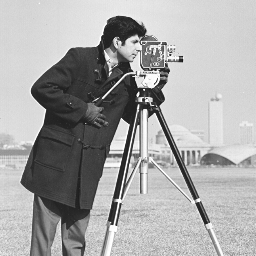

Original Image


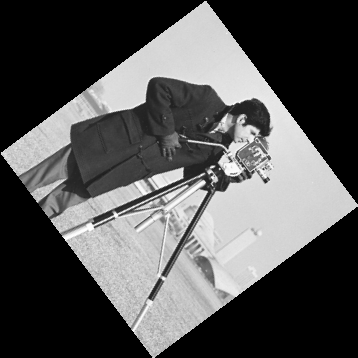

Rotated Image (Bilinear Interpolation)


In [104]:
theta = float(input("Enter Rotation Angle (in degrees): "))
cv2_imshow(image)
print("Original Image")
rotated_image_bilinear = rotate_image_bilinear(image, theta)
cv2_imshow(rotated_image_bilinear)
print("Rotated Image (Bilinear Interpolation)")

# Saving the Augmented Images
---

In [105]:
cv2.imwrite('scaled_nn_image.jpg', scaled_nn_image)
cv2.imwrite('scaled_bilinear_image.jpg', scaled_bilinear_image)
cv2.imwrite('rotated_image_nn.jpg', rotated_image_nn, )
cv2.imwrite('rotated_image_bilinear.jpg', rotated_image_bilinear)

True